In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
data=pd.read_excel('Result.xlsx')
data

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude
0,1,Fri,Even,601684654,Retail,-6.03832,106.62900
1,1,Fri,Even,601685369,Retail,-6.03169,106.66700
2,1,Fri,Even,601685370,Retail,-6.02247,106.67000
3,1,Fri,Even,601685519,Retail,-6.03414,106.63400
4,1,Fri,Even,601685520,Retail,-6.03408,106.63300
...,...,...,...,...,...,...,...
40895,84,Wed,Odd,602769095,Retail,-6.35637,106.74900
40896,84,Wed,Odd,602769096,Retail,-6.35642,106.74900
40897,84,Wed,Odd,602769097,Retail,-6.35644,106.74900
40898,84,Wed,Odd,center,Center,6.20949,106.60856


In [4]:
print(f'Jumlah baris pada dataset: {data.shape[0]}')
print(f'Jumlah kolom pada dataset: {data.shape[1]}')
print(f'Jumlah data duplikat: {data.duplicated().sum()}')
print()
data.info()

Jumlah baris pada dataset: 40900
Jumlah kolom pada dataset: 7
Jumlah data duplikat: 996

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40900 entries, 0 to 40899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Salesman   40900 non-null  int64  
 1   Day        40900 non-null  object 
 2   Pattern    40900 non-null  object 
 3   ID Outlet  40900 non-null  object 
 4   Channel    40900 non-null  object 
 5   Latitude   40900 non-null  float64
 6   Longitude  40900 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.2+ MB


In [110]:
data[data['Channel']=='Center'].head()

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude
39,1,Fri,Even,center,Center,6.20949,106.60856
40,1,Fri,Even,center,Center,6.20949,106.60856
80,1,Fri,Odd,center,Center,6.20949,106.60856
81,1,Fri,Odd,center,Center,6.20949,106.60856
122,1,Mon,Even,center,Center,6.20949,106.60856


Center Latitude= 6.20949
Center Longitude= 106.60856

In [5]:
data[data.duplicated(keep=False)]['Channel'].value_counts()

Channel
Center    1992
Name: count, dtype: int64

In [6]:
df=data[data['Channel'] != 'Center']

In [7]:
print(f'Jumlah baris pada dataset: {df.shape[0]}')
print(f'Jumlah kolom pada dataset: {df.shape[1]}')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')
print()
df.info()

Jumlah baris pada dataset: 38896
Jumlah kolom pada dataset: 7
Jumlah data duplikat: 0

<class 'pandas.core.frame.DataFrame'>
Index: 38896 entries, 0 to 40897
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Salesman   38896 non-null  int64  
 1   Day        38896 non-null  object 
 2   Pattern    38896 non-null  object 
 3   ID Outlet  38896 non-null  object 
 4   Channel    38896 non-null  object 
 5   Latitude   38896 non-null  float64
 6   Longitude  38896 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.4+ MB


In [8]:
df[df['Latitude'].isnull()]

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude


`Outlier`

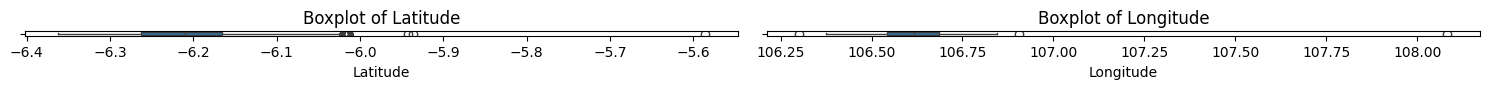

Tabel daftar outlier


,Kolom,Jumlah outlier lower limit,Jumlah outlier upper limit,Total outlier,Outlier lower limit adalah value (<=),Outlier upper limit adalah value (>=)
0,Latitude,0,84,0.22%,None,-6.01958
1,Longitude,1,2,0.01%,106.302,106.90500


In [9]:
kolom=['Latitude','Longitude']
# pengecekan outlier
result=[]

for i in kolom:
    Q1= df[i].quantile(0.25)
    Q3= df[i].quantile(0.75)
    IQR = Q3-Q1

    outlier_lower_limit=Q1-1.5*IQR
    outlier_upper_limit=Q3+1.5*IQR

    lower_limit_outliers = df[df[i]< outlier_lower_limit].sort_values(i)
    upper_limit_outliers = df[df[i]> outlier_upper_limit].sort_values(i)
    total_outliers=len(lower_limit_outliers)+len(upper_limit_outliers)
    total_data=len(df)
    if total_outliers>0:
        result.append({
        'Kolom' : i,
        'Jumlah outlier lower limit': len(lower_limit_outliers),
        'Jumlah outlier upper limit': len(upper_limit_outliers),
        'Total outlier': f'{(total_outliers/total_data) * 100:.2f}%',
        'Outlier lower limit adalah value (<=)': lower_limit_outliers[i].max() if len(lower_limit_outliers)>0 else 'None',
        'Outlier upper limit adalah value (>=)': upper_limit_outliers[i].min() if len(upper_limit_outliers)>0 else 'None'})

num_col=2
num_row=(len(kolom)+1)//num_col

fig,axes=plt.subplots(nrows=num_row,ncols=num_col, figsize=(15,num_row))
axes=axes.flatten()
for i, kol in enumerate(kolom):
    sns.boxplot(x=df[kol],ax=axes[i])
    axes[i].set_title(f'Boxplot of {kol}')
    axes[i].set_xlabel(kol)
for j in range(len(kolom),len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
print('Tabel daftar outlier')
outlier_=pd.DataFrame(result)
outlier_

`Hapus Outlier`

In [11]:
# latitude_lower_limit = float(outlier_[outlier_['Kolom'] == 'Latitude']['Outlier lower limit adalah value (<=)'].values[0])
latitude_upper_limit = float(outlier_[outlier_['Kolom'] == 'Latitude']['Outlier upper limit adalah value (>=)'].values[0])
longitude_lower_limit = float(outlier_[outlier_['Kolom'] == 'Longitude']['Outlier lower limit adalah value (<=)'].values[0])
longitude_upper_limit = float(outlier_[outlier_['Kolom'] == 'Longitude']['Outlier upper limit adalah value (>=)'].values[0])

# print(f'Latitude lower limit: {latitude_lower_limit}')
print(f'Latitude upper limit: {latitude_upper_limit}')
print(f'Longitude lower limit: {longitude_lower_limit}')
print(f'Longitude upper limit: {longitude_upper_limit}')

# Menghapus outlier dari DataFrame
df = df[
    (df['Latitude'] < latitude_upper_limit) &
    (df['Longitude'] > longitude_lower_limit) & (df['Longitude'] < longitude_upper_limit)
]
df = df[(df['Latitude'] < -6.02051)]
# Menampilkan DataFrame setelah penghapusan
print('DataFrame setelah menghapus outlier:')
df

Latitude upper limit: -6.01958
Longitude lower limit: 106.302
Longitude upper limit: 106.905
DataFrame setelah menghapus outlier:


,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude
0,1,Fri,Even,601684654,Retail,-6.03832,106.629
1,1,Fri,Even,601685369,Retail,-6.03169,106.667
2,1,Fri,Even,601685370,Retail,-6.02247,106.670
3,1,Fri,Even,601685519,Retail,-6.03414,106.634
4,1,Fri,Even,601685520,Retail,-6.03408,106.633
...,...,...,...,...,...,...,...
40893,84,Wed,Odd,602455642,Retail,-6.35610,106.763
40894,84,Wed,Odd,602751417,Retail,-6.35543,106.765
40895,84,Wed,Odd,602769095,Retail,-6.35637,106.749
40896,84,Wed,Odd,602769096,Retail,-6.35642,106.749


In [12]:
df[df['Channel']=='Grosir']['ID Outlet'].nunique()
# Grosir ada 253 Outlet

253

In [13]:
df[df['Channel']=='Retail']['ID Outlet'].nunique()
# Retail ada 38296 Outlet

38296

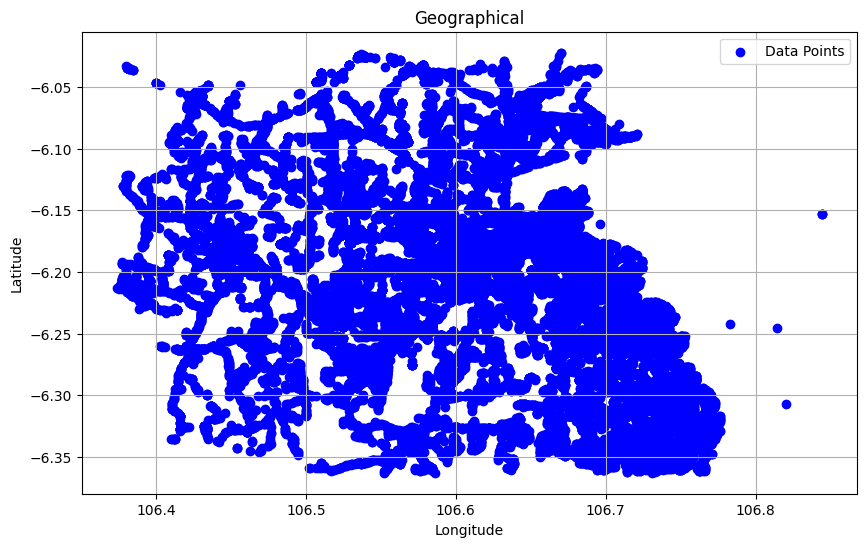

In [14]:
# # Plot Scatter letak outlet berdasarkan lat dan long
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Longitude'], df['Latitude'], c='blue', label='Data Points')

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Geographical')
# plt.legend()
# plt.grid(True)
# plt.show()

In [43]:
df_kecamatan =pd.read_csv('KecamatanTangerang.csv')
df_kecamatan

,Kecamatan,Latitude,Longitude
0,Batuceper,-6.1786,106.6426
1,Benda,-6.2692,106.7527
2,Cibodas,-6.1889,106.6146
3,Ciledug,-6.1863,106.6600
4,Cipondoh,-6.1916,106.6542
5,Jatiuwung,-6.1739,106.6068
6,Karangtengah,-6.2192,106.6600
7,Karawaci,-6.1950,106.6467
8,Larangan,-6.1912,106.6976
9,Neglasari,-6.1796,106.6361


In [44]:
from geopy.distance import geodesic

In [45]:
def find_nearest_kecamatan(lat, lon, df_kecamatan):
    min_distance = float('inf')
    nearest_kecamatan = None
    for _, row in df_kecamatan.iterrows():
        ref_point = (row['Latitude'], row['Longitude'])
        dist = geodesic((lat, lon), ref_point).kilometers
        if dist < min_distance:
            min_distance = dist
            nearest_kecamatan = row['Kecamatan']
    return nearest_kecamatan

# Terapkan fungsi ke DataFrame outlet
df['Kecamatan'] = df.apply(lambda row: find_nearest_kecamatan(row['Latitude'], row['Longitude'], df_kecamatan), axis=1)

In [34]:
# df['Kecamatan'].value_counts()

Kecamatan
Benda            6655
Teluknaga        3275
Mekarbaru        2529
Karangtengah     2414
Jambe            2191
Curug            1856
Kemiri           1775
Larangan         1415
Cisauk           1342
Jatiuwung        1199
Gunung Kaler     1194
Pinang           1040
Batuceper        1010
Balaraja         1009
Ciledug           828
Sepatan           745
Cisoka            726
Kosambi           710
Periuk            667
Neglasari         632
Rajeg             605
Mauk              540
Kelapa Dua        512
Cibodas           491
Jayanti           425
Karawaci          385
Cikupa            358
Tigaraksa         355
Pakuhaji          298
Panongan          264
Sindang Jaya      208
Solear            181
Sukamulya         173
Sepatan Timur     142
Legok             129
Kresek            129
Kronjo            104
Pagedangan        103
Cipondoh          100
Pasar Kemis        82
Tangerang           3
Name: count, dtype: int64

In [46]:
df[df['Kecamatan']=='Ciputat']

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kecamatan,Kota


In [47]:
kota_tangsel_kecamatan = ['Ciputat', 'Ciputat Timur', 'Pamulang', 'Pondok Aren', 'Serpong', 'Serpong Utara', 'Setu']
tangerang_kecamatan = ['Batuceper','Benda','Cibodas','Ciledug','Cipondoh','Jatiuwung','Karangtengah','Karawaci','Larangan','Neglasari','Periuk','Pinang','Tangerang']

# Fungsi untuk menentukan nilai kolom 'Kota'
def assign_kota(kecamatan):
    if kecamatan in kota_tangsel_kecamatan:
        return 'Tangerang Selatan'
    elif kecamatan in tangerang_kecamatan:
        return 'Kota Tangerang'
    else:
        return 'Kabupaten Tangerang'

# Terapkan fungsi ke DataFrame
df['Kota'] = df['Kecamatan'].apply(assign_kota)


In [48]:
df['Kota'].value_counts()

Kota
Kabupaten Tangerang    21960
Kota Tangerang         16837
Tangerang Selatan          2
Name: count, dtype: int64

In [49]:
df[df['ID Outlet']==601342298]

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kecamatan,Kota
31669,66,Fri,Even,601342298,Grosir,-6.27724,106.756,Benda,Kota Tangerang


In [50]:

df=df.drop(df[df['ID Outlet']==601287740].index)
df=df.drop(df[df['ID Outlet']==601342298].index)


In [51]:
df

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kecamatan,Kota
0,1,Fri,Even,601684654,Retail,-6.03832,106.629,Teluknaga,Kabupaten Tangerang
1,1,Fri,Even,601685369,Retail,-6.03169,106.667,Teluknaga,Kabupaten Tangerang
2,1,Fri,Even,601685370,Retail,-6.02247,106.670,Teluknaga,Kabupaten Tangerang
3,1,Fri,Even,601685519,Retail,-6.03414,106.634,Teluknaga,Kabupaten Tangerang
4,1,Fri,Even,601685520,Retail,-6.03408,106.633,Teluknaga,Kabupaten Tangerang
...,...,...,...,...,...,...,...,...,...
40893,84,Wed,Odd,602455642,Retail,-6.35610,106.763,Benda,Kota Tangerang
40894,84,Wed,Odd,602751417,Retail,-6.35543,106.765,Benda,Kota Tangerang
40895,84,Wed,Odd,602769095,Retail,-6.35637,106.749,Benda,Kota Tangerang
40896,84,Wed,Odd,602769096,Retail,-6.35642,106.749,Benda,Kota Tangerang


In [52]:
df.to_excel('clustering_results.xlsx', index=False)

Exception ignored in: <function ZipFile.__del__ at 0x000001F545457880>
Traceback (most recent call last):
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1940, in __del__
    self.close()
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1957, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
